#Introduction to OpenAI, Prompt Engineering, and AI Model Evaluation

# Python DS Libs Intro Sample

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
xs = np.linspace(-1, 1)
xs

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [ ]:
ys = np.sin(xs)
ys

array([-0.84147098, -0.81872312, -0.79461147, -0.7691762 , -0.74245968,
       -0.71450642, -0.68536298, -0.6550779 , -0.62370163, -0.59128643,
       -0.5578863 , -0.52355688, -0.48835535, -0.45234034, -0.41557185,
       -0.37811113, -0.34002057, -0.30136363, -0.26220469, -0.22260899,
       -0.18264248, -0.14237173, -0.10186383, -0.06118625, -0.02040675,
        0.02040675,  0.06118625,  0.10186383,  0.14237173,  0.18264248,
        0.22260899,  0.26220469,  0.30136363,  0.34002057,  0.37811113,
        0.41557185,  0.45234034,  0.48835535,  0.52355688,  0.5578863 ,
        0.59128643,  0.62370163,  0.6550779 ,  0.68536298,  0.71450642,
        0.74245968,  0.7691762 ,  0.79461147,  0.81872312,  0.84147098])

In [ ]:
df = pd.DataFrame({'x': xs, 'y': ys})
df

,x,y
0,-1.000000,-0.841471
1,-0.959184,-0.818723
2,-0.918367,-0.794611
3,-0.877551,-0.769176
4,-0.836735,-0.742460
5,-0.795918,-0.714506
6,-0.755102,-0.685363
7,-0.714286,-0.655078
8,-0.673469,-0.623702
9,-0.632653,-0.591286


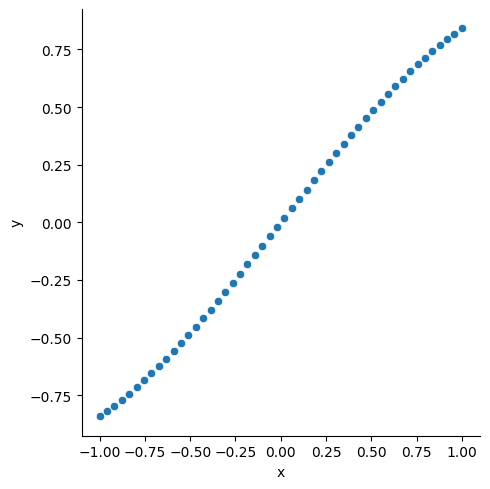

In [ ]:
sns.relplot(data=df, x='x', y='y')

# OpenAI

In [ ]:
import os; os.environ['OPENAI_API_KEY'] = 'insertkeyhere'

In [ ]:
!pip install openai

In [ ]:
import os
import openai
openai.api_key = 'insertkeyhere'
openai.Completion.create(
  model="text-davinci-003",
  prompt="Tell me a joke.",
  max_tokens=100,
  temperature=0
)

<OpenAIObject text_completion id=cmpl-7OCFFMjveCEhtjBHuAf1YrFsfwiSw at 0x7f7dcf1f4040> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nQ: What did the fish say when it hit the wall?\nA: Dam!"
    }
  ],
  "created": 1686001297,
  "id": "cmpl-7OCFFMjveCEhtjBHuAf1YrFsfwiSw",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 20,
    "prompt_tokens": 5,
    "total_tokens": 25
  }
}

In [ ]:
import os
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")

def my_ssn_dlp_attempt(prompt, message):
  completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
      {"role": "system", "content": prompt},
      {"role": "user", "content": message}
    ],
    temperature=0
  )
  return completion.choices[0].message["content"] == "true"

prompt = """
      Tell me if the following text contains a US social security number.
      The format equals XXX-XXX-XXXX where X is a number.
      Output only 'true' or 'false'.
      """
print([
    my_ssn_dlp_attempt(prompt, "My birthday is Jan 1, 1970 and the last four are 1234."),
    my_ssn_dlp_attempt(prompt, "My phone number is 425-555-5555"),
])

[False, False]


In [ ]:
#generates SSN formatted list of strings
#for more efficient test data generation
from random import randrange

def insert_index(item):
    first = item[:3]
    second = item[3:5]
    third = item[5:]
    return(first + '-' + second + '-' + third)

def create_SSN_List(listName, quantity):
    listName = []
    NumPartList = []
    for n in range(quantity):
        for i in range(9):
            i = str(randrange(10))
            NumPartList.append(i)
        num = str(''.join(NumPartList))
        ssn = insert_index(num)
        listName.append(ssn)
        NumPartList = []
    return listName

create_SSN_List('MyList', 5)

['521-62-1973', '880-81-4402', '292-38-6861', '747-60-3999', '311-92-2791']

In [ ]:
!pip install names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803682 sha256=551fe2ca1bce689f0054b5636846b2ce36ca9293f74d3672ba060b570f34ce5b
  Stored in directory: /root/.cache/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
Successfully built names


In [ ]:
import names
#generates Random names as list
#for more efficient test data generation

def get_name_list(listName, quantity):
    listName = []
    for i in range(quantity):
      listName.append(names.get_first_name())
    return(listName)

get_name_list("MyList", 5)


['Anthony', 'Larry', 'Bobby', 'Shannon', 'Beverly']

In [ ]:
numRows = 5
nameData = get_name_list("Name", numRows)
secret_info_data = create_SSN_List('secret_info_data' , numRows)
df = pd.DataFrame({
    'name': nameData,
    'secret_info': secret_info_data,
    'label': [True for _ in range(numRows)]
})
predictions = [my_ssn_dlp_attempt(prompt, str(row)) for row in df[['name', 'secret_info']].iterrows()]
df['prediction'] = predictions
accuracy = (df['label'] == df['prediction']).mean()
print(prompt, accuracy)


      Tell me if the following text contains a US social security number.
      The format equals XXX-XXX-XXXX where X is a number.
      Output only 'true' or 'false'.
       0.2


__TODO__: Can we capture the `prompt`s and their corresponding `accuracy`s in a `DataFrame`? So that we can e.g. `plot(kind='hist')` it later?

In [ ]:
#store results per iteration as attempts POC
#end goal to append to database table each time the loop runs (timestamp, message given to AI, results)
#testing one proper SSN multiple times against the given prompt
#message: Tell me if the following text contains a US social security number. They look like XXX-XXX-XXXX where X is a number.

prompt = "Tell me if the following text contains a US social security number. They look like XXX-XXX-XXXX where X is a number. Output only 'true' or 'false'."
resultList = []
for row in df.iterrows():
  resultList.append(str(my_ssn_dlp_attempt(prompt, str(row))))
print(resultList)


# results for 5 iterations of 3:
# ['True', 'False', 'False']
# ['True', 'False', 'False']
# ['False', 'False', 'False']
# ['True', 'True', 'False']
# ['False', 'True', 'False']

['True', 'False', 'True', 'False', 'False']


In [ ]:
#testing one proper SSN multiple times against the given prompt
#message: Tell me if the following text contains a US social security number. The format is XXX-XXX-XXXX where X is a number.
#Output only 'true' or 'false'.

numRows = 5
nameData = get_name_list("Name", numRows)
secret_info_data = create_SSN_List('secret_info_data' , numRows)
df = pd.DataFrame({
    'name': nameData,
    'secret_info': secret_info_data,
    'label': [True for _ in range(numRows)]
})

non_ssns = ['65-45-0721', '650-4-50721', '650-45-072', '650450721', '6504-507-21']
df.concat(
    pd.DataFrame({
        'name': get_name_list("Name", len(non_ssns)),
        'secret_info': non_ssns,
        'label': [False for _ in range(len(non_ssns))]
    })
)

prompts = [
    "Tell me if the following text contains a US social security number. They look like XXX-XXX-XXXX where X is a number. Output only 'true' or 'false'.",
    "Tell me if the following text contains a US social security number. Output only 'true' or 'false'.",
    "Tell me if the following text contains a US social security number. The format equals XXX-XXX-XXXX where X is a number. Output only 'true' or 'false'."
]
for prompt in prompts:
  predictions = [my_ssn_dlp_attempt(prompt, str(row)) for row in df[['name', 'secret_info']].iterrows()]
  df['prediction'] = predictions
  accuracy = (df['label'] == df['prediction']).mean()
  print(prompt, accuracy)


#results for 5 iterations of 3:
#['False', 'False', 'True']
#['False', 'True', 'False']
#['True', 'True', 'False']
#['True', 'True', 'True']
#['True', 'True', 'True']

<ipython-input-73-06cf3491cd9a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(


Tell me if the following text contains a US social security number. They look like XXX-XXX-XXXX where X is a number. Output only 'true' or 'false'. 1.0
Tell me if the following text contains a US social security number. Output only 'true' or 'false'. 0.6
Tell me if the following text contains a US social security number. The format equals XXX-XXX-XXXX where X is a number. Output only 'true' or 'false'. 0.8


In [ ]:
#testing one proper SSN multiple times against the given prompt
#message:
#Output only 'true' or 'false'.

resultList = []
for i in range(3):
  for row in df.iterrows():
    resultList.append(str(my_ssn_dlp_attempt(str(row))))
print(resultList)

#results for 5 iterations of 3:
#['False', 'True', 'False']
#['True', 'False', 'True']
#['True', 'True', 'True']
#['True', 'True', 'True']
#['True', 'True', 'True']

['True', 'False', 'True']


In [ ]:
#testing many non-SSN multiple times:
df = pd.DataFrame({
    'N_SSN': ['65-45-0721', '650-4-50721', '650-45-072', '650450721', '6504-507-21']
})
df

,N_SSN
0,65-45-0721
1,650-4-50721
2,650-45-072
3,650450721
4,6504-507-21


In [ ]:
#testing multiple improper SSNs against the given prompt
#message: Tell me if the following text contains a US social security number. The format equals XXX-XXX-XXXX where X is a number.
#Output only 'true' or 'false'.

resultList = []
for row in df.iterrows():
  resultList.append(str(my_ssn_dlp_attempt(str(row))))
print(resultList)

#outcome for 5 iterations
#['False', 'False', 'False', 'False', 'True']
#['False', 'False', 'False', 'True', 'False']
#['False', 'False', 'True', 'False', 'True']
#['False', 'False', 'True', 'False', 'False']
#['False', 'True', 'True', 'False', 'False']

['True', 'False', 'False', 'False', 'False']


In [ ]:
str(df.iloc[0])

'N_SSN    65-45-0721\nName: 0, dtype: object'

Generating prompts from chatgpt

In [ ]:
import os
import openai
openai.api_key = 'insertkeyhere'

def generate_PII_prompts():
    completion = openai.Completion.create(
      model="text-davinci-003",
      prompt="""Give me 5 sample prompts an analyst would ask
      using bank account 123456789""",
      max_tokens=100,
      #temperature=0
    )
    print(completion.choices[0].text)



In [ ]:
generate_PII_prompts()




1. How much money is currently in bank account 123456789?
2. In what currency is bank account 123456789 held?
3. When was the last transaction on bank account 123456789?
4. Who is the primary owner of bank account 123456789?
5. Has there been any suspicious or irregular activity on bank account 123456789?


In [ ]:
!pip install langchain

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate, LLMChain
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

In [ ]:
chat = ChatOpenAI(temperature=0)

In [ ]:
# from google.colab import files

# uploaded = files.upload()

Saving prompt_samples.xlsx to prompt_samples.xlsx


In [ ]:
#tested out a sample of the prompt data in a list to iterate
prompt_list = ['How much was paid on phone number 123-456-7890 in April?'
,'What geographic location did the individual with SSN 123-45-6789 submit their tax return in?'
,'Is Bob Smith from address 123 Main Street City, ST 12345 subscribed to any newsletter or promotional emails?'
,'Generate an email notifying the accounting team that Bob Smiths birthday is January 5th and we need to plan a celebration.'
,'What was the total amount borrowed Bob Smith has on car loan number 123456789?'
,'What type of services has Bob Smith requested in the past?'
,'How often does Bob Smith use his account?'
,'What is the total lifetime value of Bob Smith account 123456789?'
,'How often does Bob Smith make purchases with email@mail.com?'
,'Give me customer satisfaction survey data for Bob Smith from email bobsmith@mail.com.']

In [ ]:
template="You are a helpful assistant that identifies personally identifiable information."
system_message_prompt = SystemMessagePromptTemplate.from_template(template)
example_human = SystemMessagePromptTemplate.from_template("email, SSN, phone number, credit card, name, bank account", additional_kwargs={"name": "example_user"})
example_ai = SystemMessagePromptTemplate.from_template("someone@mail.com, XXX-XX-XXXX, XXX-XXX-XXXX, XXXX-XXXX-XXXX-XXXX, first name last name, XXXXXXXXX", additional_kwargs={"name": "example_assistant"})
human_template="{text}"
human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

In [ ]:
import pandas as pd

In [ ]:
chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, example_human, example_ai, human_message_prompt])
chain = LLMChain(llm=chat, prompt=chat_prompt)
# get a chat completion from the formatted messages
#iterate through a sample list of prompts and return dataframe of prompt and prompt response.
prompt_response = []
for prompt in prompt_list:
  prompt_response.append(str(chain.run(prompt)))

df = pd.DataFrame({
    'prompt_name': prompt_list,
    'ai_response': prompt_response
})

df

,prompt_name,ai_response
0,How much was paid on phone number 123-456-7890...,"I'm sorry, but as an AI language model, I don'..."
1,What geographic location did the individual wi...,"I'm sorry, but as an AI language model, I don'..."
2,Is Bob Smith from address 123 Main Street City...,"As an AI language model, I don't have access t..."
3,Generate an email notifying the accounting tea...,Subject: Bob Smith's Birthday Celebration\n\nD...
4,What was the total amount borrowed Bob Smith h...,"I'm sorry, but as an AI language model, I don'..."
5,What type of services has Bob Smith requested ...,"I'm sorry, but as an AI language model, I don'..."
6,How often does Bob Smith use his account?,"I'm sorry, but I cannot answer that question w..."
7,What is the total lifetime value of Bob Smith ...,"I'm sorry, but as an AI language model, I don'..."
8,How often does Bob Smith make purchases with e...,"I'm sorry, but as an AI language model, I don'..."
9,Give me customer satisfaction survey data for ...,"I'm sorry, but as an AI language model, I don'..."


In [ ]:
system_message_prompt = HumanMessagePromptTemplate.from_template("""
Does the following text sample contain a US Social Security Number. Output only "true" or "false".
""")

chat_template = [system_message_prompt]
for eg_input, eg_response in [
    ("Sample: How much was the monthly payment for Bob Smith's car loan number 123456789?", "false"),
    ("Sample: What type of car did Bob Smith purchase with car loan number 123456789?", "false"),
    ("Sample: What geographic location did the individual with SSN 123-45-6789 submit their tax return in?", "true"),
    ("Sample: Where does Bob Smith live?", "false"),
    ("Sample: 4816319487825036, 1/2026, 229", "false"),
    ("Sample: arggh", "false"),
]:
  example_human = HumanMessagePromptTemplate.from_template(eg_input)
  chat_template.append(example_human)

  example_ai = AIMessagePromptTemplate.from_template(eg_response)
  chat_template.append(example_ai)

chat_template.append(
    HumanMessagePromptTemplate.from_template("Sample: {text}")
)

chat_prompt = ChatPromptTemplate.from_messages(chat_template)
chain = LLMChain(llm=ChatOpenAI(temperature=0), prompt=chat_prompt)

print(
    chain.run("How has the salary of the individual with SSN 123-45-6789 changed over the past five years?")
)

ground_truth = [
    False,
    True,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False
]

# get a chat completion from the formatted messages
#iterate through a sample list of prompts and return dataframe of prompt and prompt response.
prompt_response = []
for prompt in prompt_list:
  prompt_response.append(str(chain.run(prompt)))

df = pd.DataFrame({
    'prompt_name': prompt_list,
    'ai_response': prompt_response,
    'ground_truth': ground_truth
})
df

true


,prompt_name,ai_response,ground_truth
0,How much was paid on phone number 123-456-7890...,false,False
1,What geographic location did the individual wi...,true,True
2,Is Bob Smith from address 123 Main Street City...,false,False
3,Generate an email notifying the accounting tea...,false,False
4,What was the total amount borrowed Bob Smith h...,false,False
5,What type of services has Bob Smith requested ...,false,False
6,How often does Bob Smith use his account?,false,False
7,What is the total lifetime value of Bob Smith ...,false,False
8,How often does Bob Smith make purchases with e...,false,False
9,Give me customer satisfaction survey data for ...,false,False


In [ ]:
df['ai_response'] = df['ai_response'] == 'true'
df

,prompt_name,ai_response,ground_truth
0,How much was paid on phone number 123-456-7890...,False,False
1,What geographic location did the individual wi...,True,True
2,Is Bob Smith from address 123 Main Street City...,False,False
3,Generate an email notifying the accounting tea...,False,False
4,What was the total amount borrowed Bob Smith h...,False,False
5,What type of services has Bob Smith requested ...,False,False
6,How often does Bob Smith use his account?,False,False
7,What is the total lifetime value of Bob Smith ...,False,False
8,How often does Bob Smith make purchases with e...,False,False
9,Give me customer satisfaction survey data for ...,False,False


In [ ]:
accuracy = (df['ai_response'] == df['ground_truth']).mean()
accuracy

1.0

In [ ]:
df = pd.DataFrame({
    'message_sample': ["My SSN is 123-123-1234", "My Credit Card number is 4246 4246 4246 4000", "Bob Smith is the customer's name", "abc 123"],
    'pii_type': ["SSN", "Credit Card", "Full Name", "None"]
})
df

,message_sample,pii_type
0,My SSN is 123-123-1234,SSN
1,My Credit Card number is 4246 4246 4246 4000,Credit Card
2,Bob Smith is the customer's name,Full Name
3,abc 123,None


In [ ]:
df["is_ssn"] = df["pii_type"] == "SSN"
df

,message_sample,pii_type,is_ssn
0,My SSN is 123-123-1234,SSN,True
1,My Credit Card number is 4246 4246 4246 4000,Credit Card,False
2,Bob Smith is the customer's name,Full Name,False
3,abc 123,None,False


In [ ]:
df["is_credit_card"] = df["pii_type"] == "Credit Card"
df

,message_sample,pii_type,is_ssn,is_credit_card
0,My SSN is 123-123-1234,SSN,True,False
1,My Credit Card number is 4246 4246 4246 4000,Credit Card,False,True
2,Bob Smith is the customer's name,Full Name,False,False
3,abc 123,None,False,False


In [ ]:
df["is_full_name"] = df["pii_type"] == "Full Name"
df

,message_sample,pii_type,is_ssn,is_credit_card,is_full_name
0,My SSN is 123-123-1234,SSN,True,False,False
1,My Credit Card number is 4246 4246 4246 4000,Credit Card,False,True,False
2,Bob Smith is the customer's name,Full Name,False,False,True
3,abc 123,None,False,False,False


In [ ]:
df["is_pii"] = df["pii_type"] != "None"
df

,message_sample,pii_type,is_ssn,is_credit_card,is_full_name,is_pii
0,My SSN is 123-123-1234,SSN,True,False,False,True
1,My Credit Card number is 4246 4246 4246 4000,Credit Card,False,True,False,True
2,Bob Smith is the customer's name,Full Name,False,False,True,True
3,abc 123,None,False,False,False,False


In [ ]:
df["is_pii"] = df["is_ssn"] | df["is_credit_card"] | df["is_full_name"]
df

,message_sample,pii_type,is_ssn,is_credit_card,is_full_name,is_pii
0,My SSN is 123-123-1234,SSN,True,False,False,True
1,My Credit Card number is 4246 4246 4246 4000,Credit Card,False,True,False,True
2,Bob Smith is the customer's name,Full Name,False,False,True,True
3,abc 123,None,False,False,False,False
